In [1]:
!mkdir placee_detect
%cd placee_detect

/content/placee_detect


In [2]:
!git clone https://github.com/ultralytics/ultralytics

Cloning into 'ultralytics'...
remote: Enumerating objects: 7541, done.
remote: Counting objects: 100% (519/519), done.
remote: Compressing objects: 100% (269/269), done.
remote: Total 7541 (delta 316), reused 408 (delta 248), pack-reused 7022
Receiving objects: 100% (7541/7541), 5.14 MiB | 26.60 MiB/s, done.
Resolving deltas: 100% (5193/5193), done.


In [3]:
%cd ultralytics
!pip install -r requirements.txt

/content/placee_detect/ultralytics
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
%pip install -q roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 KB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 KB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 9.0 MB/s eta 0:00:00


In [5]:
import os

os.environ["DATASET_DIRECTORY"] = "/content/placee_detect/datasets"

In [6]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="a0oNpPm0UsvgxBr2O32C")
project = rf.workspace("adrian-workspace").project("banguntidur")
dataset = project.version(2).download("yolov8")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.58, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to /content/placee_detect/datasets/BangunTidur-2 in yolov8:: 100%|██████████| 1032/1032 [00:00<00:00, 2663.62it/s]


In [7]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolov8s.yaml")  # build a new model from scratch
model = YOLO("yolov8s.pt")  # load a pretrained model (recommended for training)

# Use the model
model.train(data="/content/placee_detect/datasets/BangunTidur-2/data.yaml", epochs=5)  # train the model
metrics = model.val()  # evaluate model performance on the validation set
success = model.export(format="onnx")  # export the model to ONNX format


                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.Conv                  [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.Conv                  [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.C2f                   [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.Conv                  [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.C2f                   [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.Conv                  [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.C2f                   [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics.nn.modules.Conv                  [256

  0%|          | 0.00/21.5M [00:00<?, ?B/s]

Ultralytics YOLOv8.0.58 🚀 Python-3.9.16 torch-1.13.1+cu116 CPU
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/placee_detect/datasets/BangunTidur-2/data.yaml, epochs=5, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=

  0%|          | 0.00/755k [00:00<?, ?B/s]

Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.Conv                  [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.Conv                  [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.C2f                   [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.Conv                  [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.C2f                   [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.Conv                  [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.C2f                   [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

In [8]:
results = model.val()

Ultralytics YOLOv8.0.58 🚀 Python-3.9.16 torch-1.13.1+cu116 CPU
val: Scanning /content/placee_detect/datasets/BangunTidur-2/valid/labels.cache... 103 images, 0 backgrounds, 0 corrupt: 100%|██████████| 103/103 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:49<00:00,  7.02s/it]
                   all        103        103      0.926      0.956      0.965      0.945
               Dikasur        103         50      0.942       0.96      0.979      0.935
               berdiri        103         35      0.987      0.971      0.993      0.977
       duduk di lantai        103         18      0.849      0.936      0.924      0.923
Speed: 1.8ms preprocess, 463.4ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to /content/placee_detect/ultralytics/runs/detect/val2


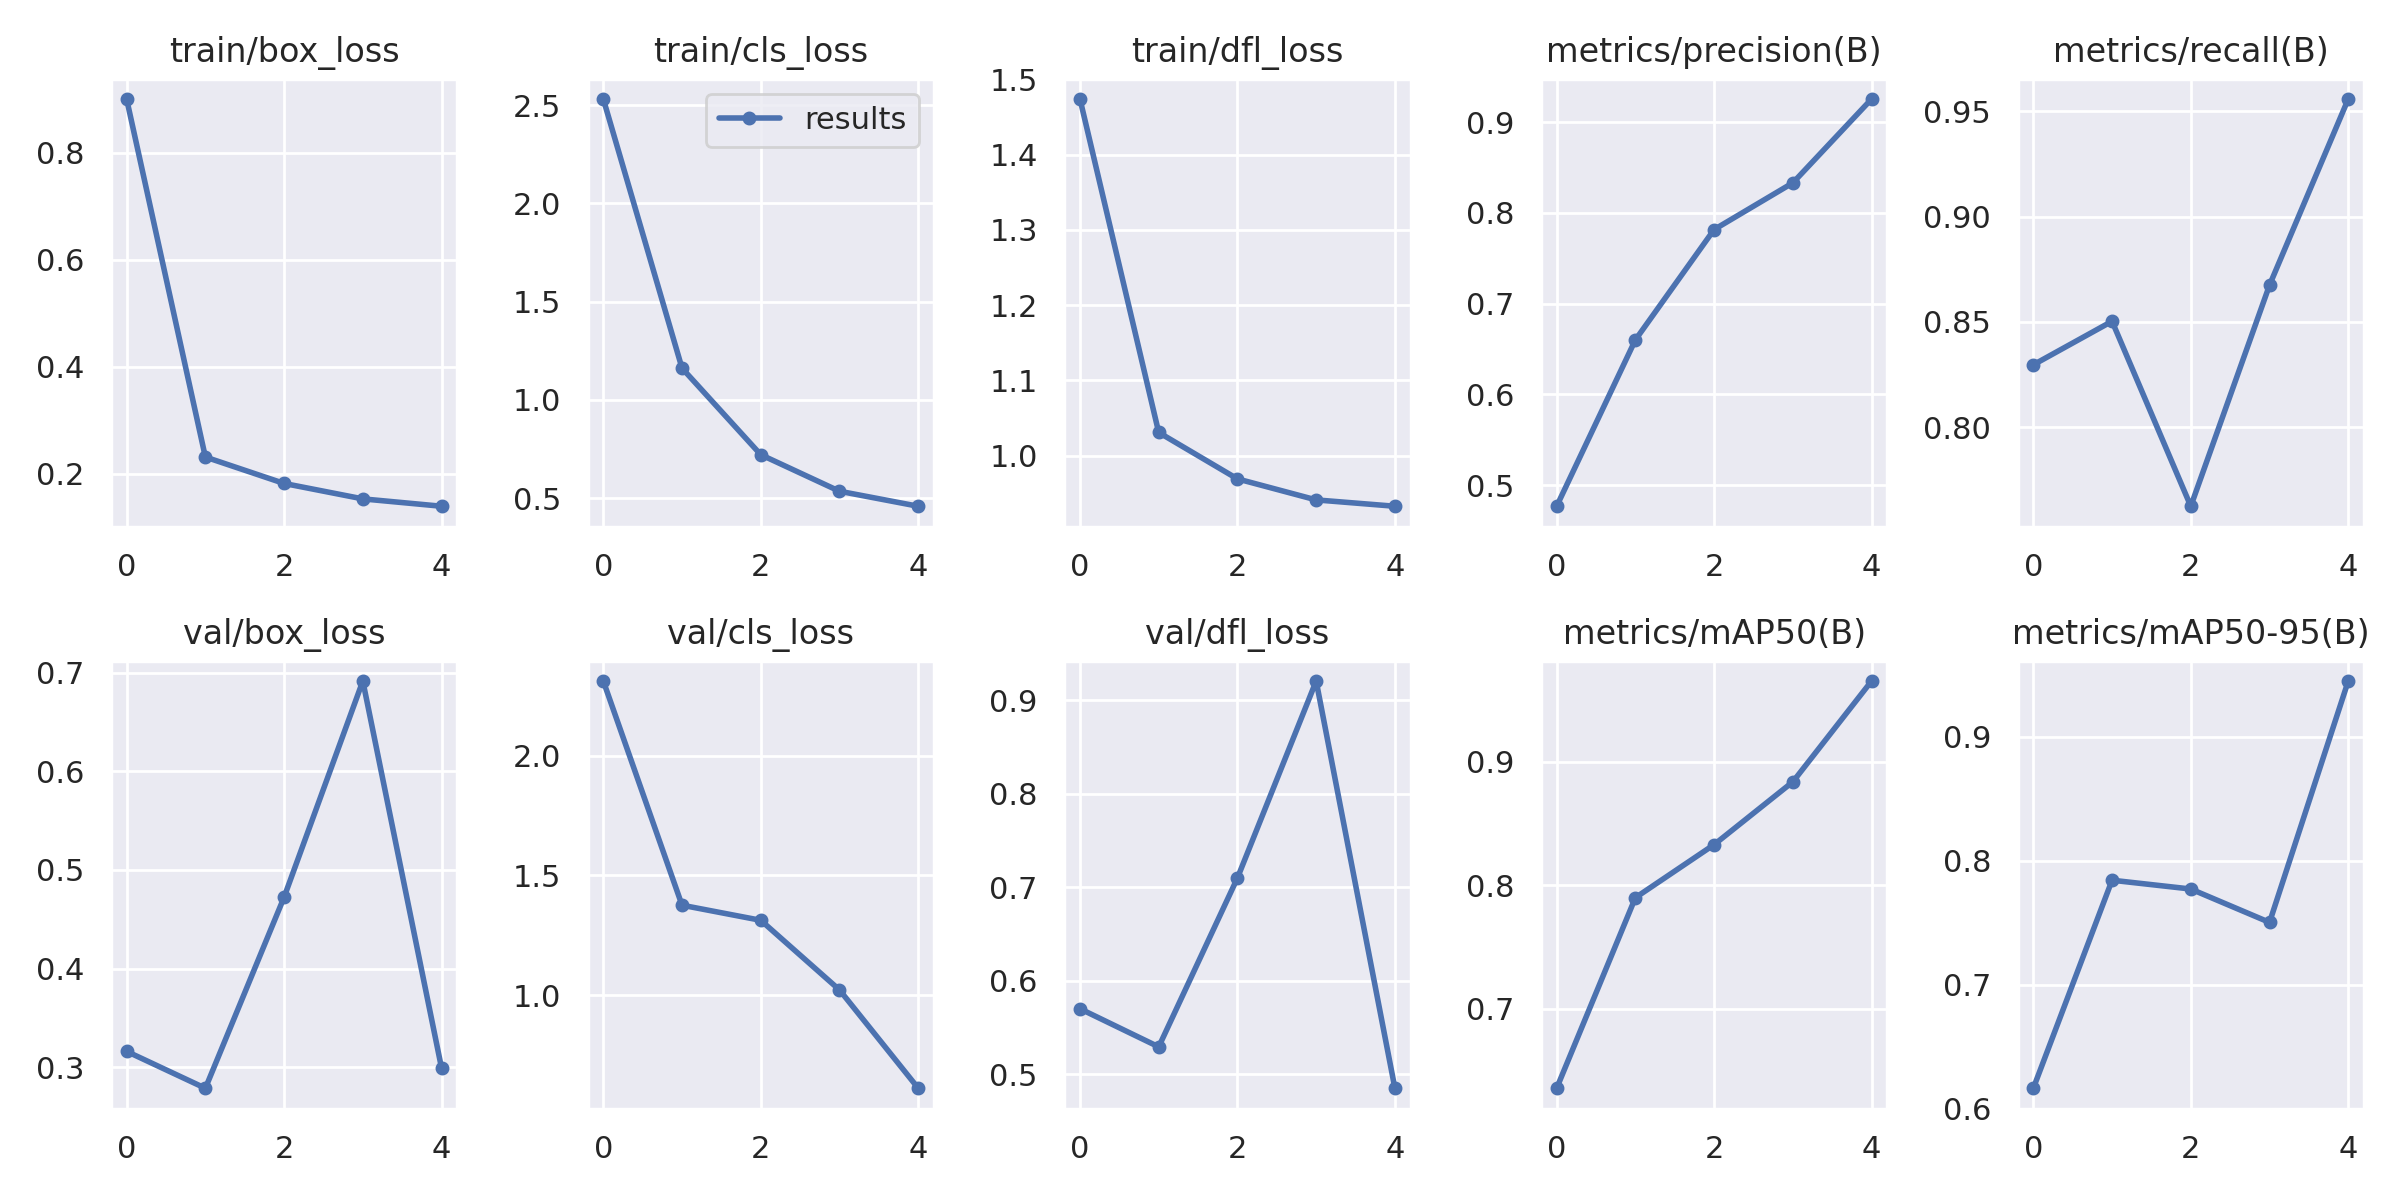

In [9]:
from IPython.display import Image
Image(filename='/content/placee_detect/ultralytics/runs/detect/train/results.png')

In [10]:
results = model.track('/content/placee_detect/datasets/BangunTidur-2/test/images', save=True)

requirements: YOLOv8 requirement "lap>=0.4" not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 49.4 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for lap: filename=lap-0.4.0-cp39-cp39-linux_x86_64.whl size=1655026 sha256=7579338968ed2dabf7df0674f684b23b6532a478a27551baf87b06a762e13a99
  Stored in directory: /root/.cache/pip/wheels/2f/8b/30/e7dd4f9dc44fb438381df571c9a6bddc35aafd1bf39c4f8911
Successfully built lap

requirements: 1 package updated per ['lap>=0.4']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


image 1/51 /content/placee_detect/datasets/BangunTidur-2/test/images/WIN_20230329_13_09_56_Pro_jpg.rf.a002aa4503d246c24099a419b6a9f4fb.jpg: 640x640 1 duduk di lantai, 566.7ms
image 2/51 /content/placee_detect/datasets/BangunT

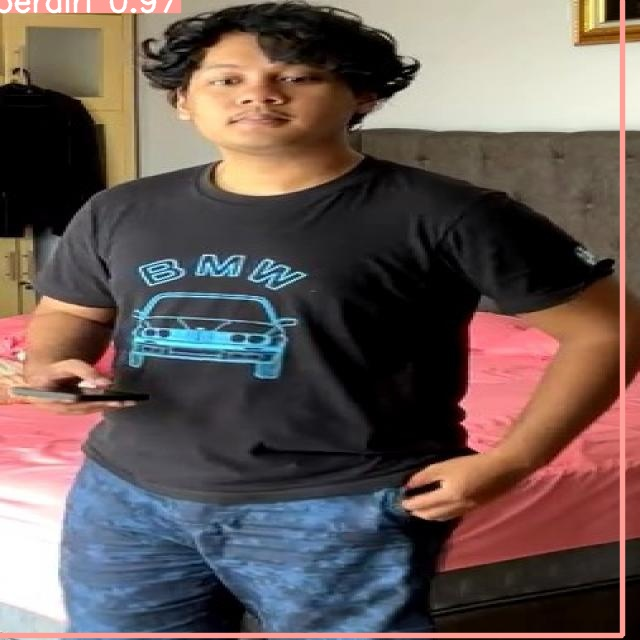

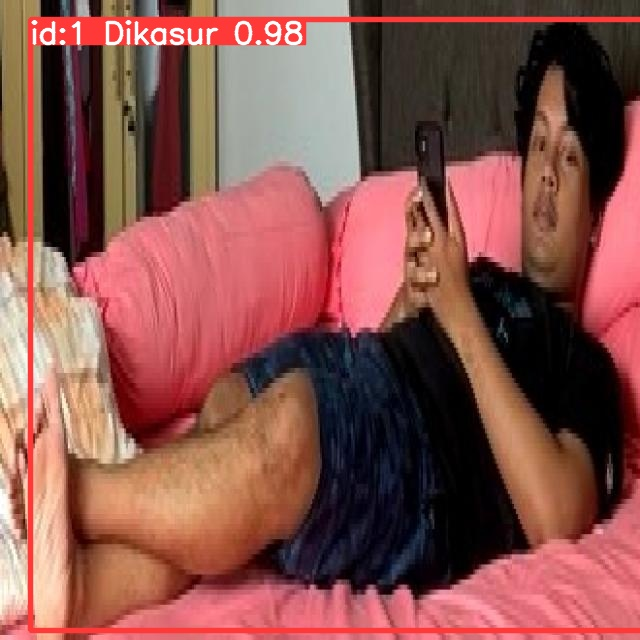

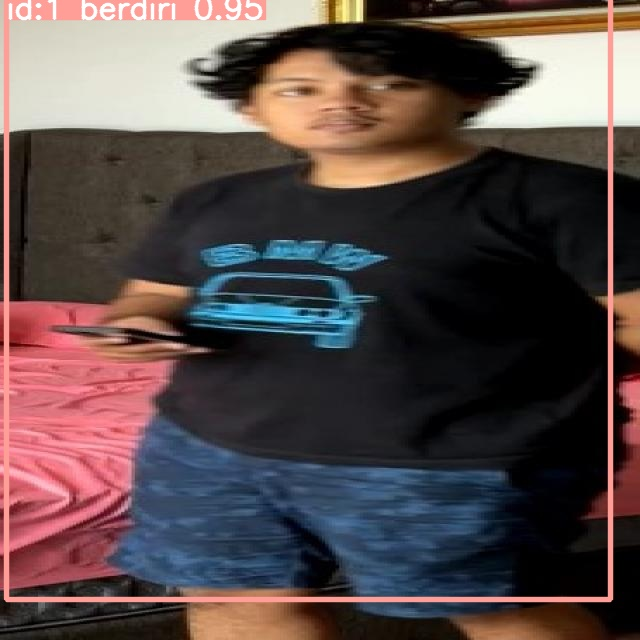

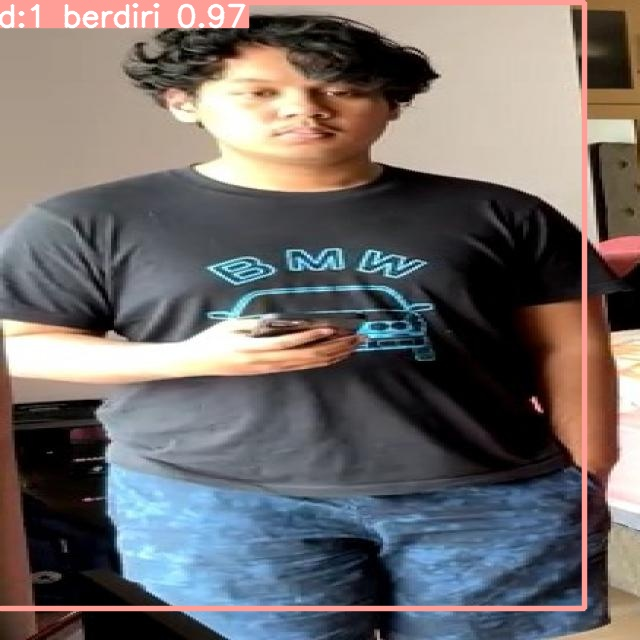

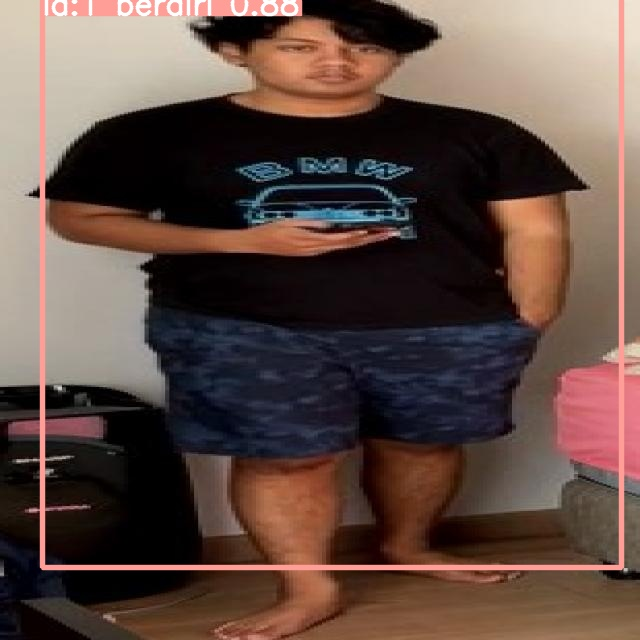

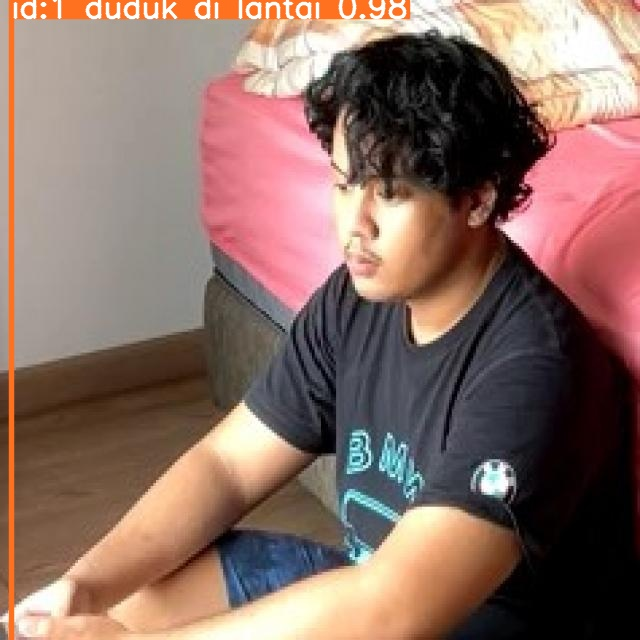

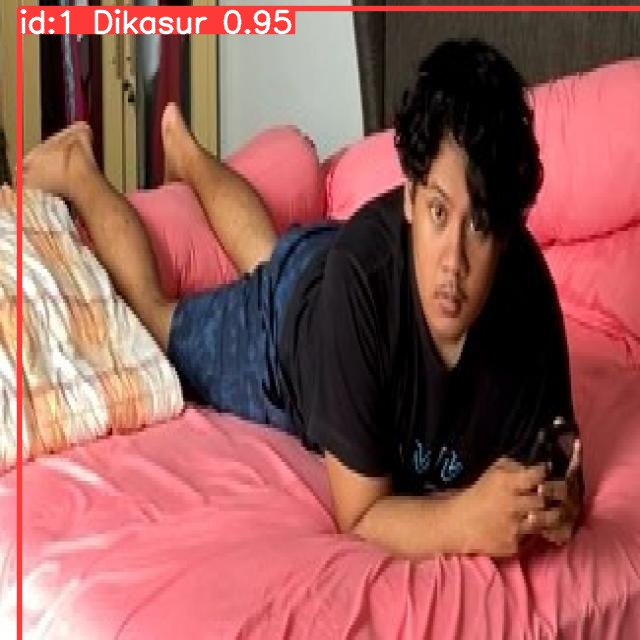

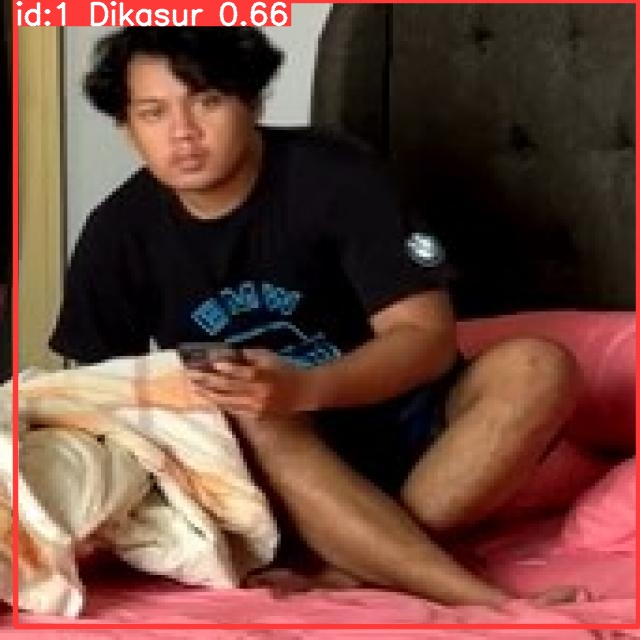

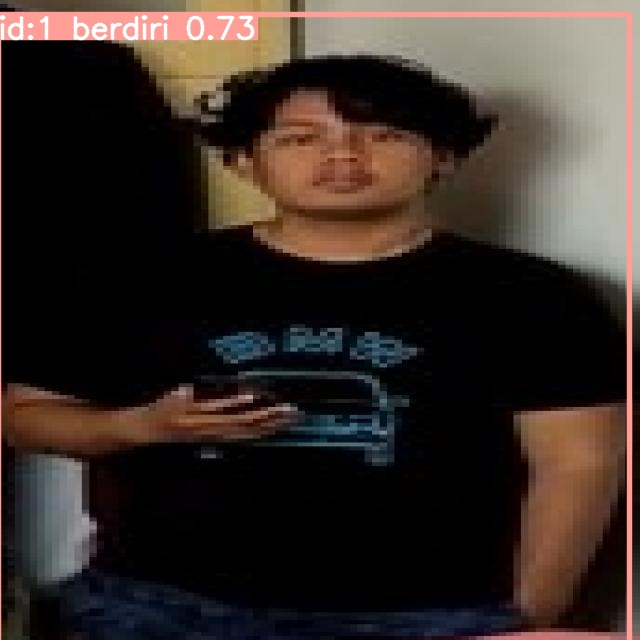

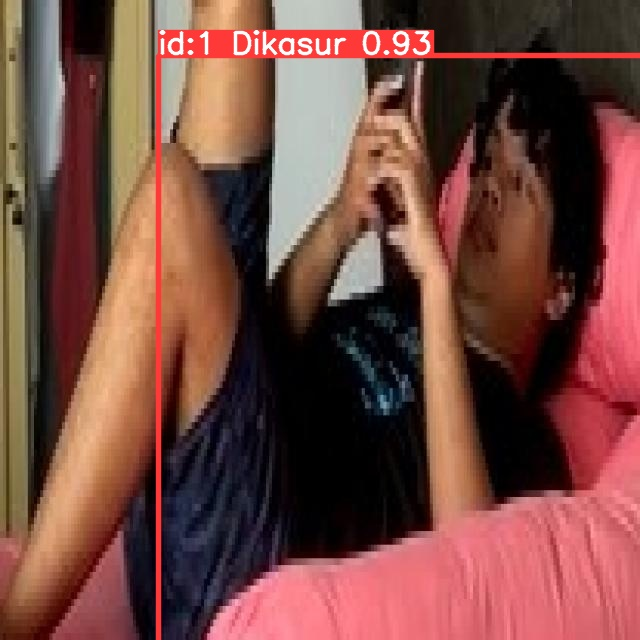

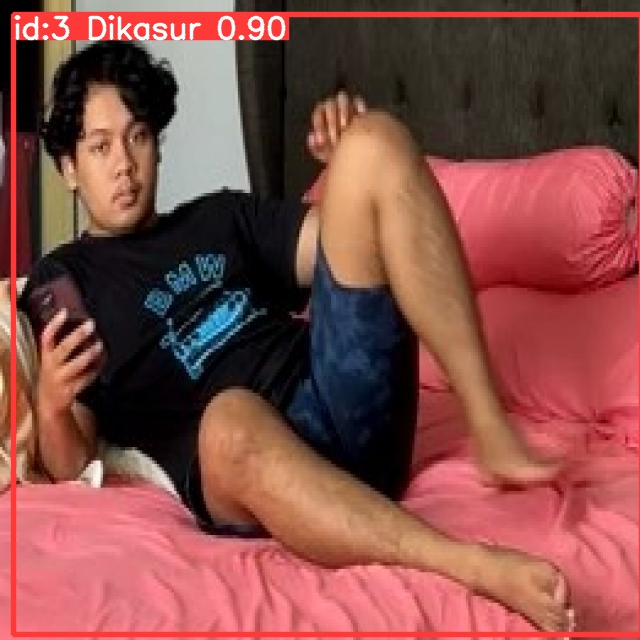

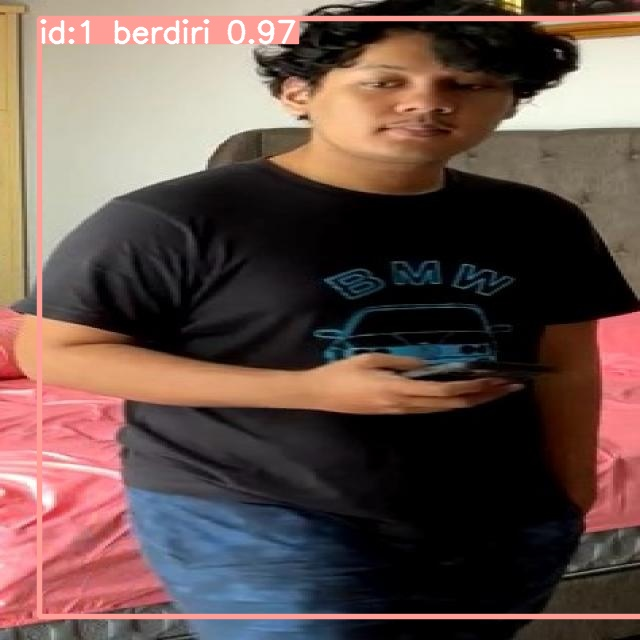

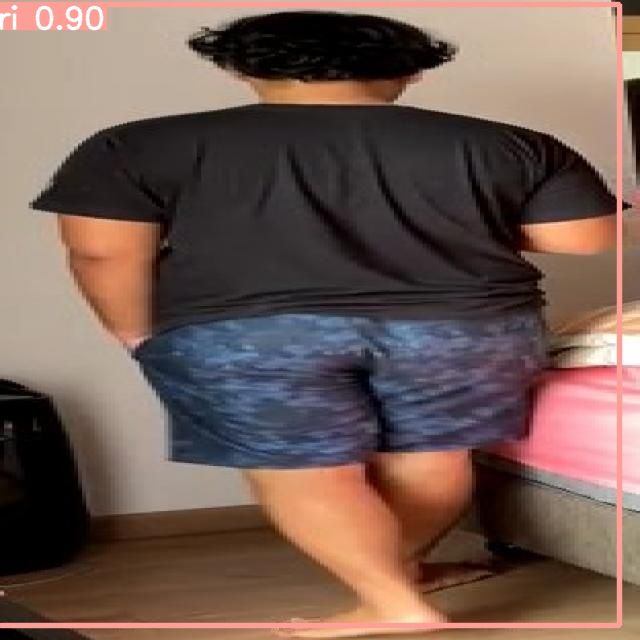

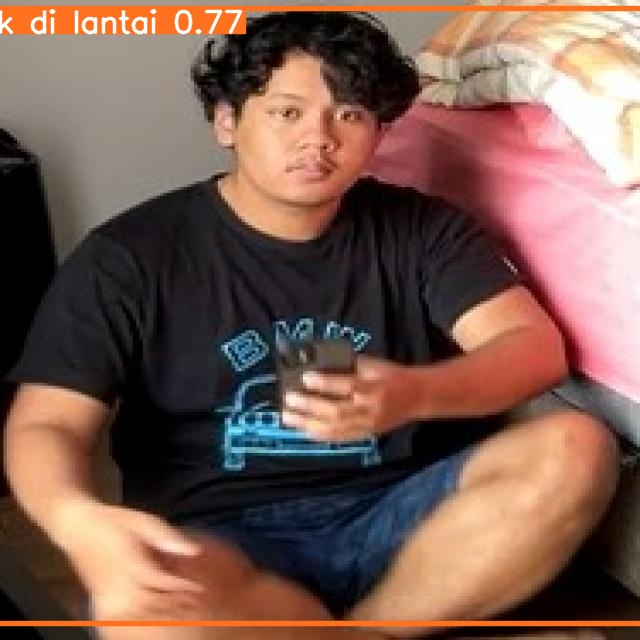

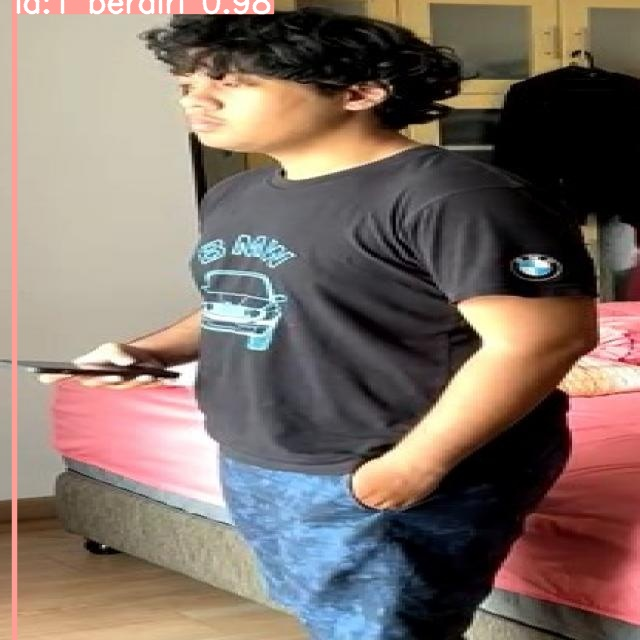

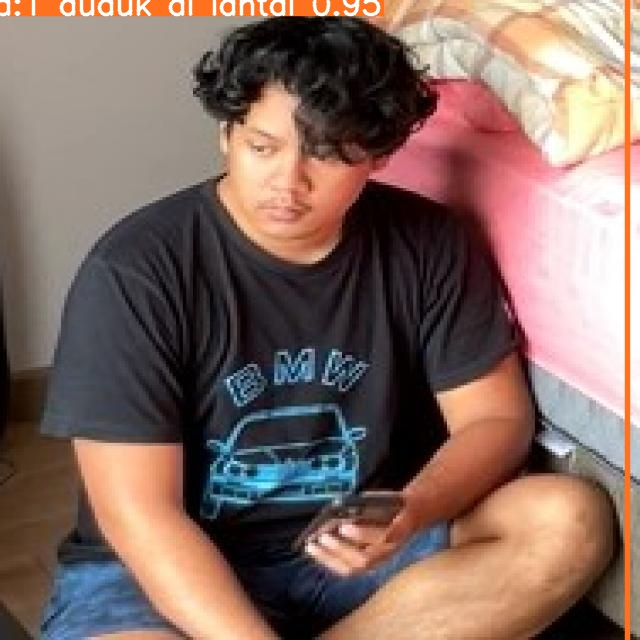

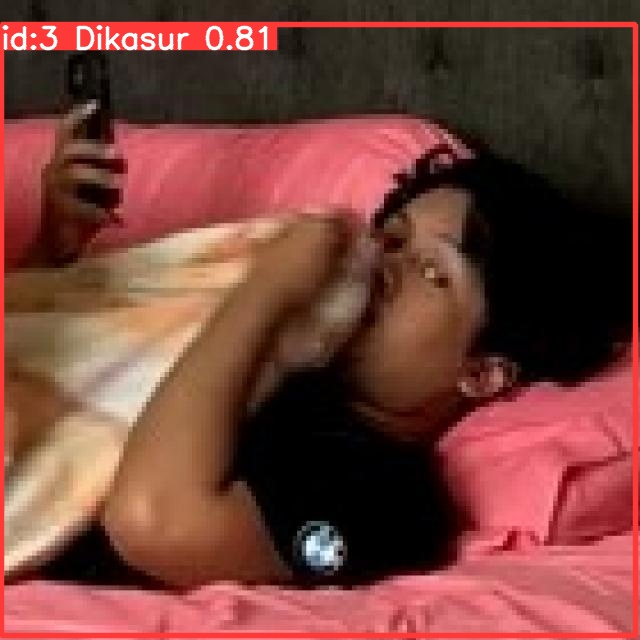

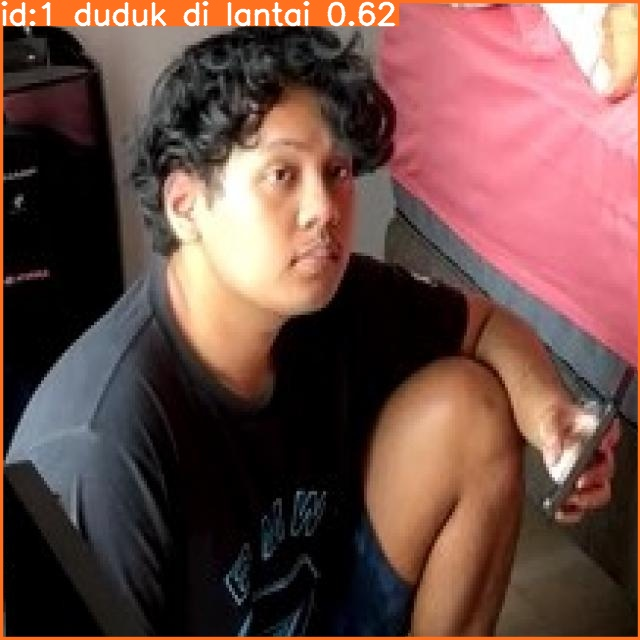

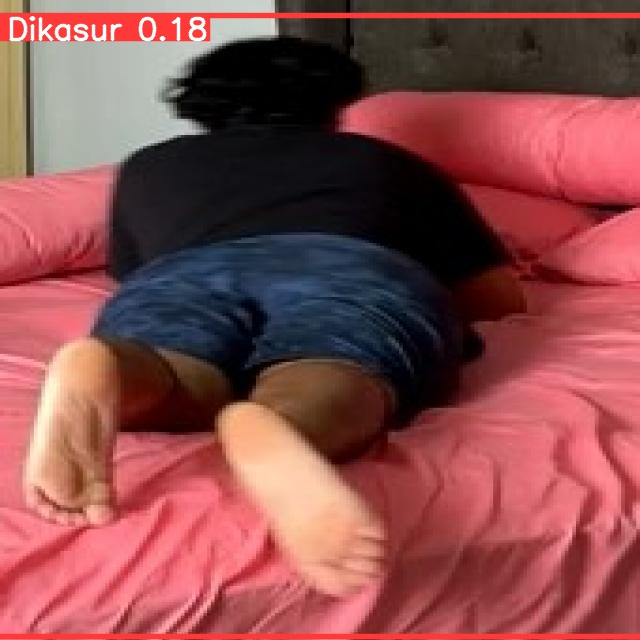

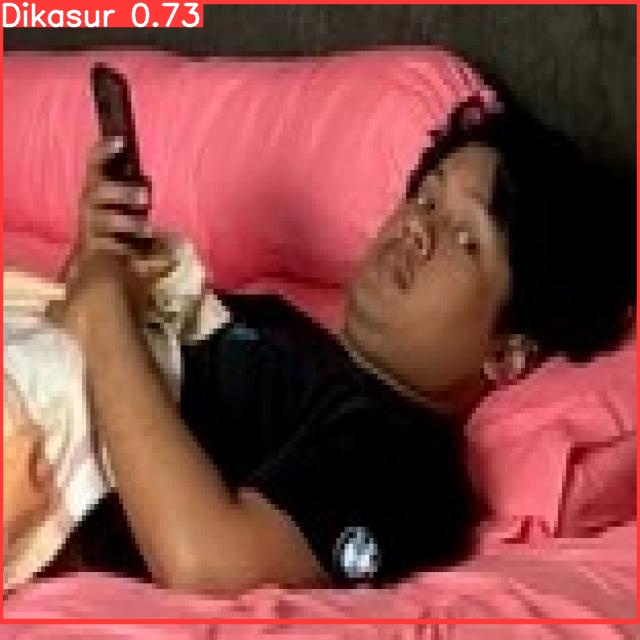

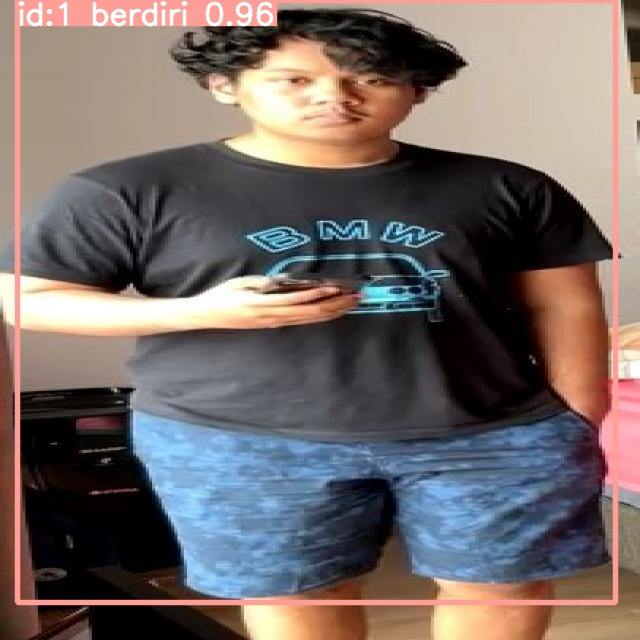

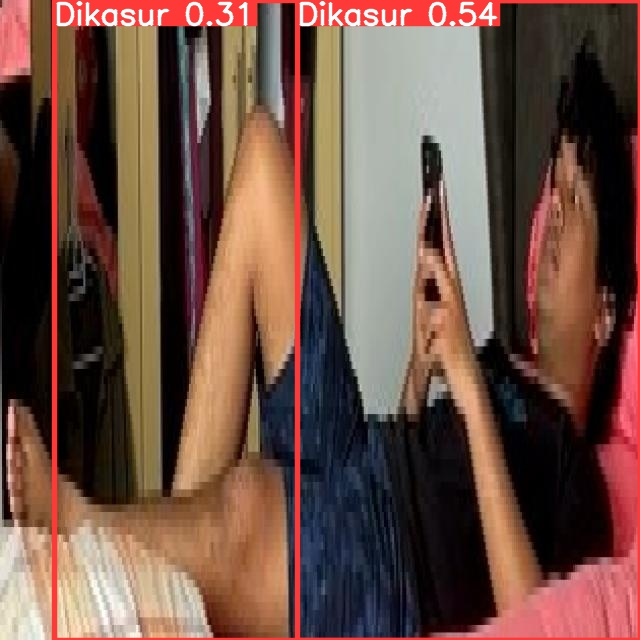

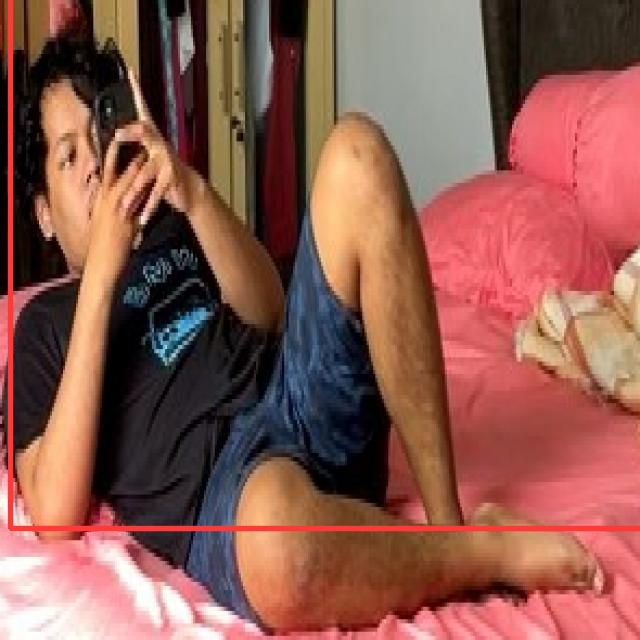

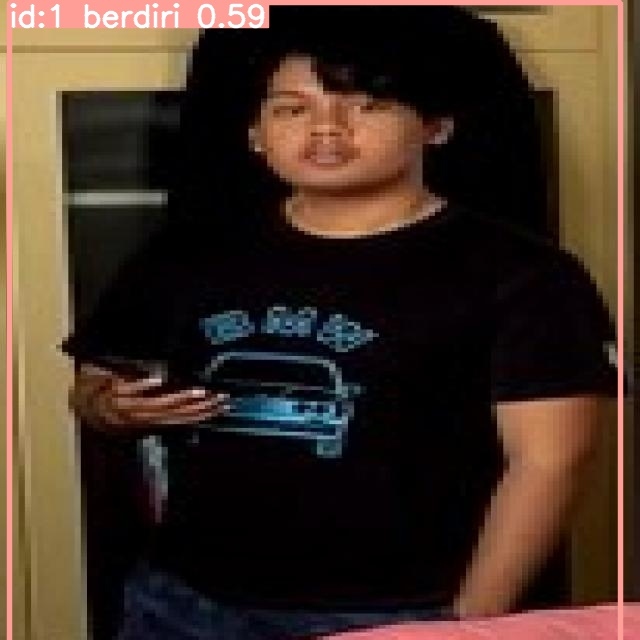

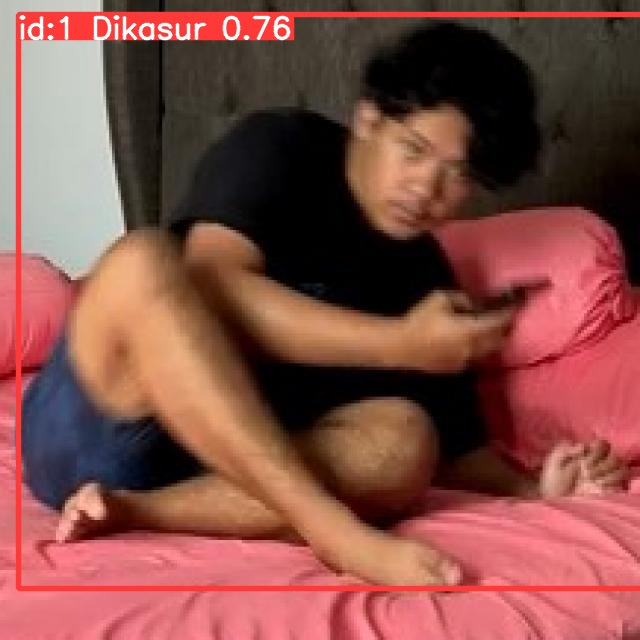

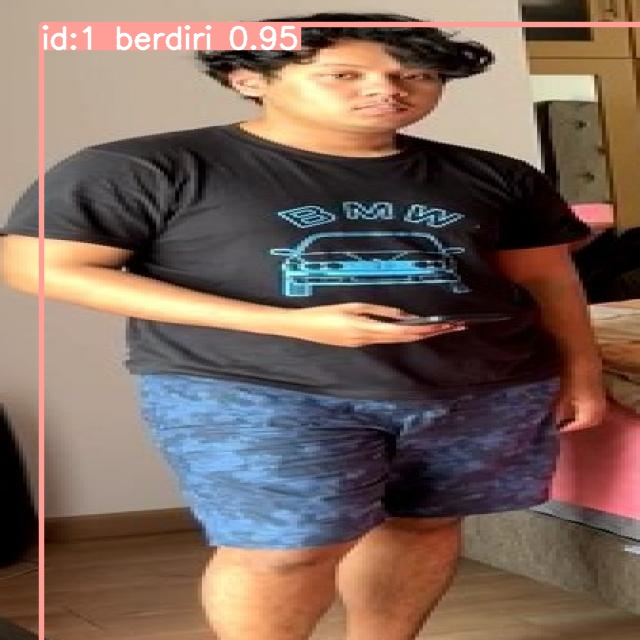

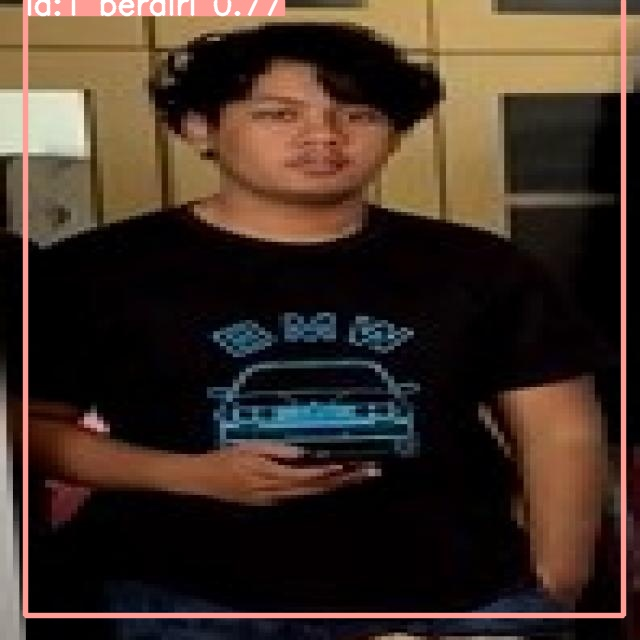

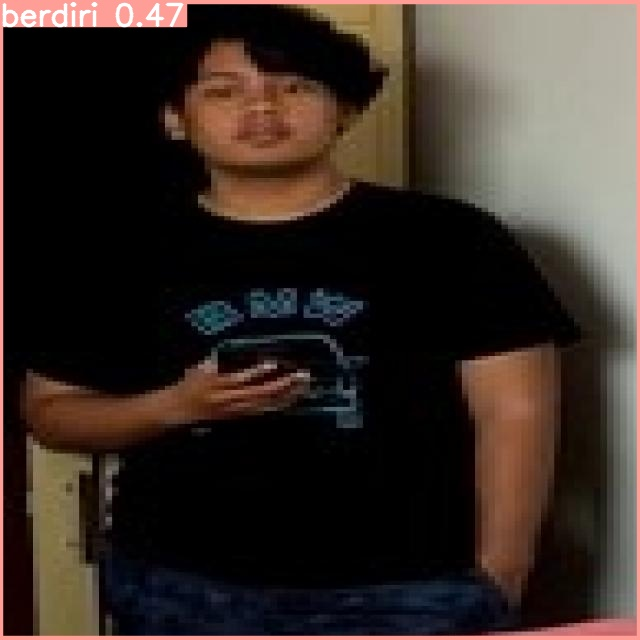

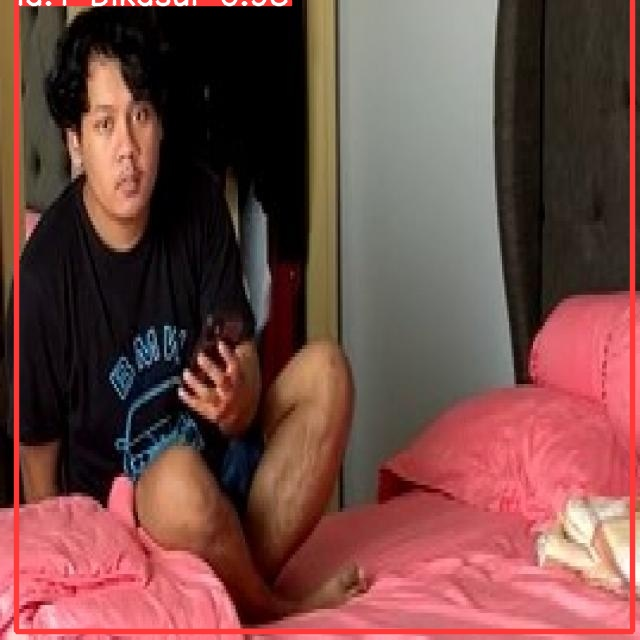

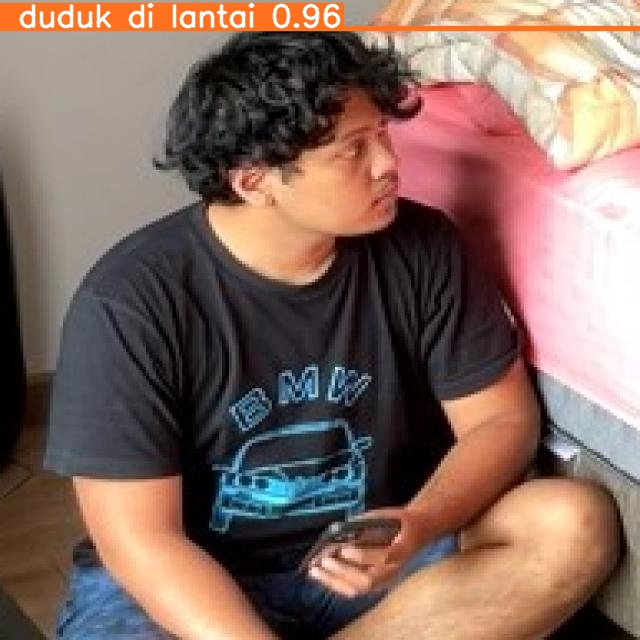

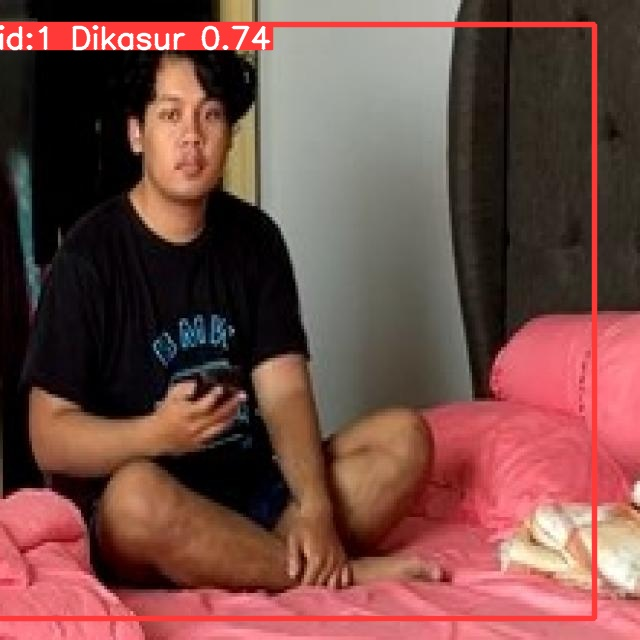

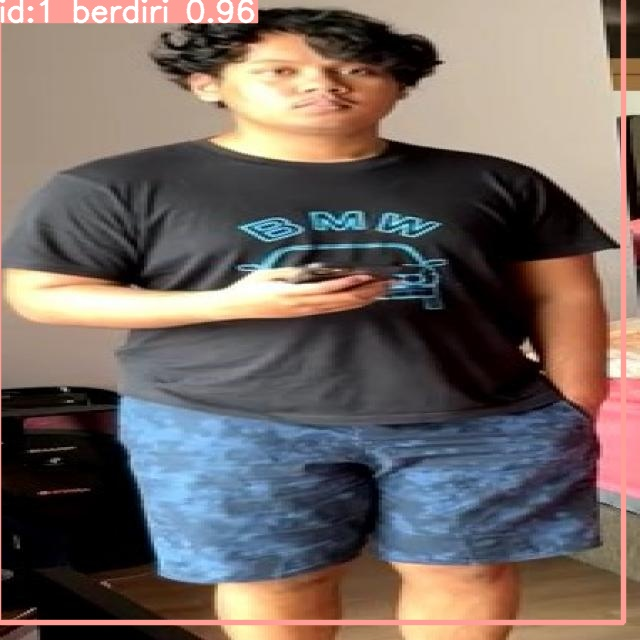

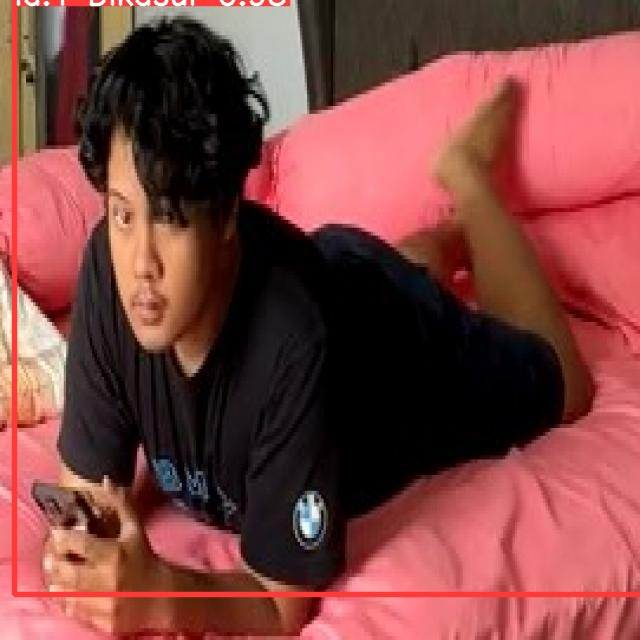

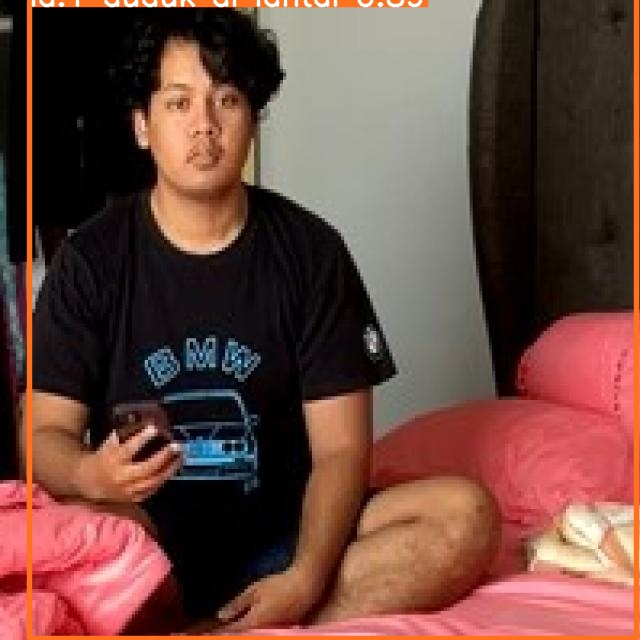

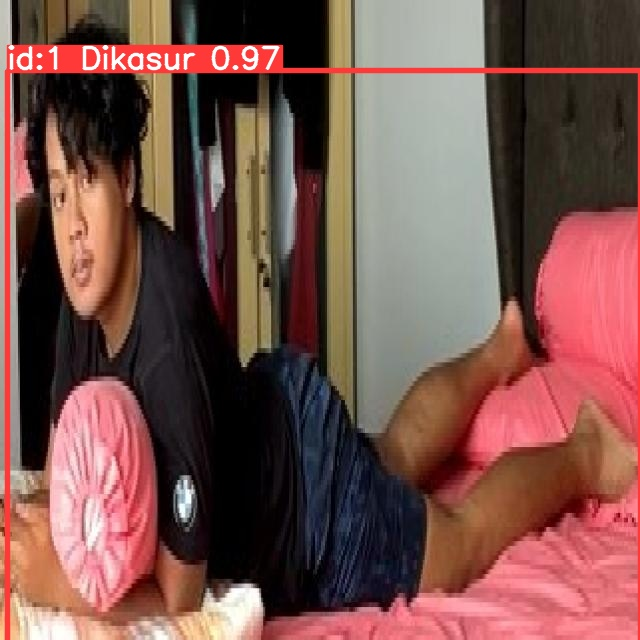

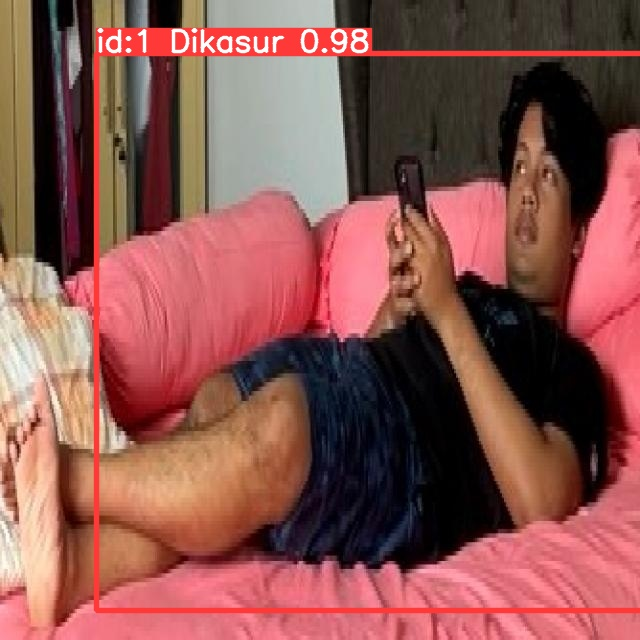

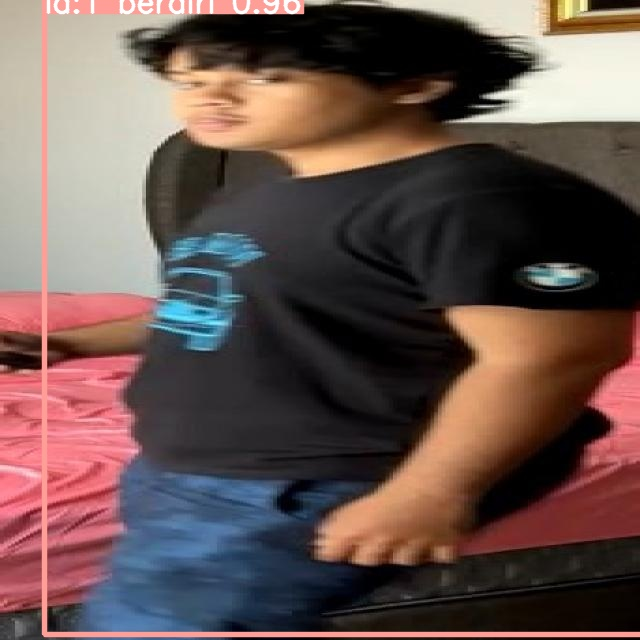

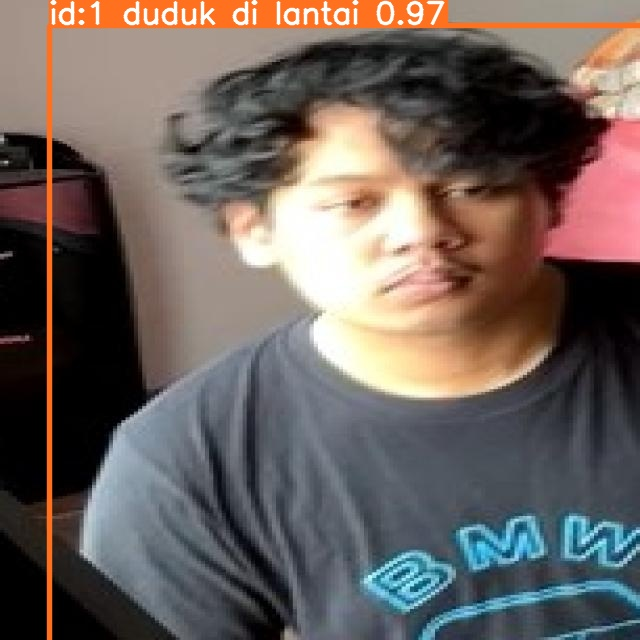

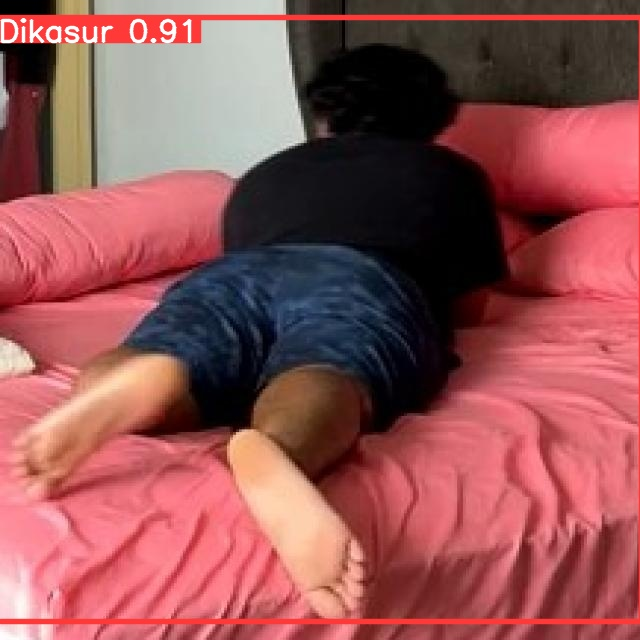

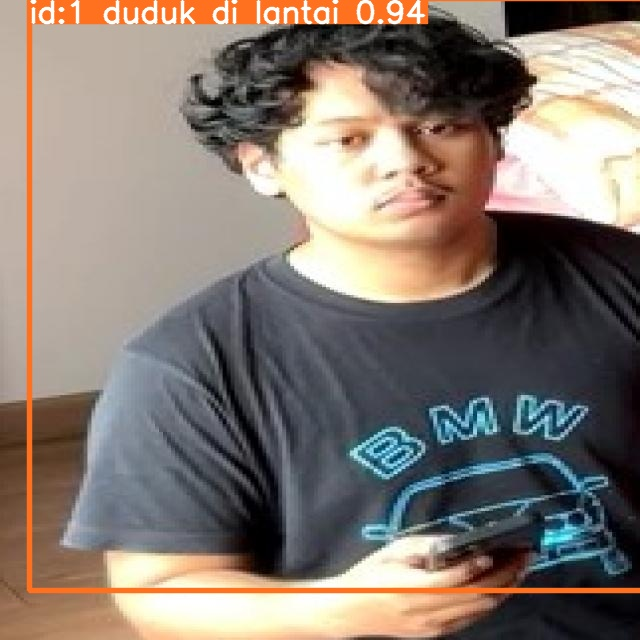

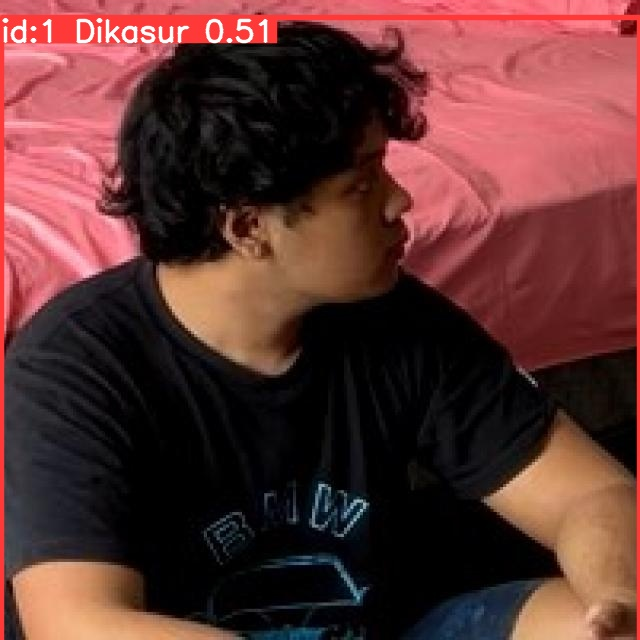

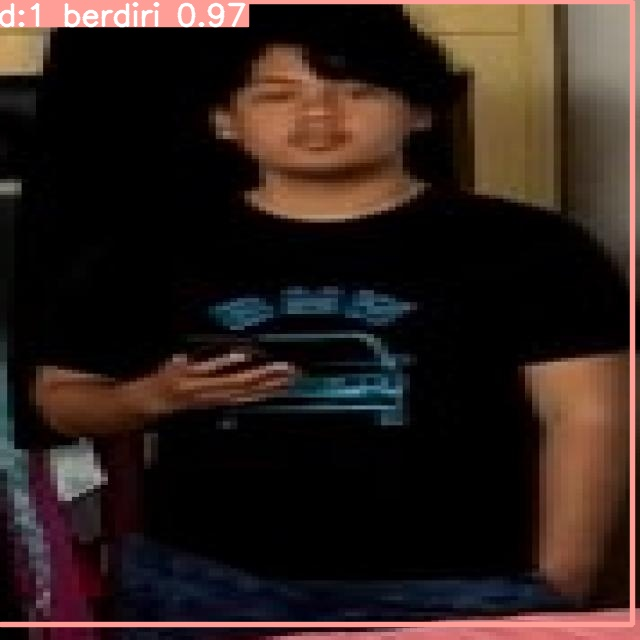

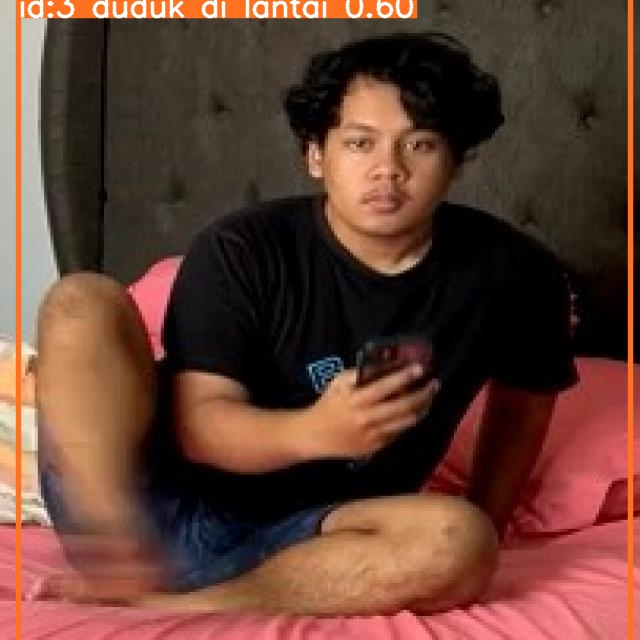

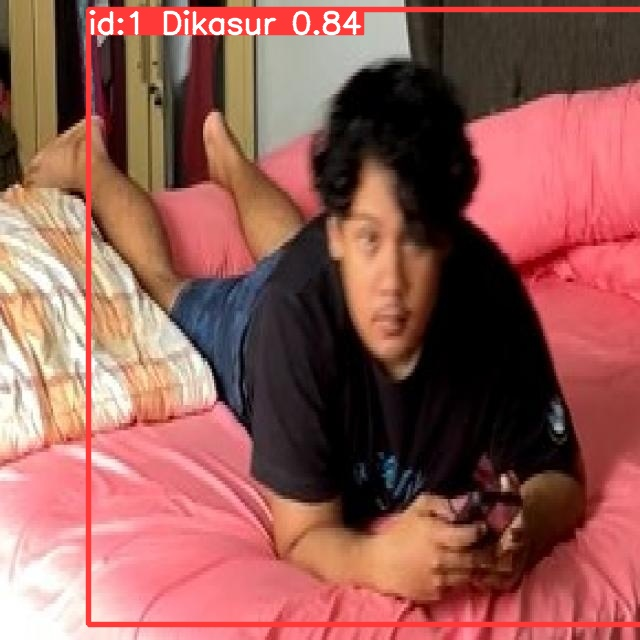

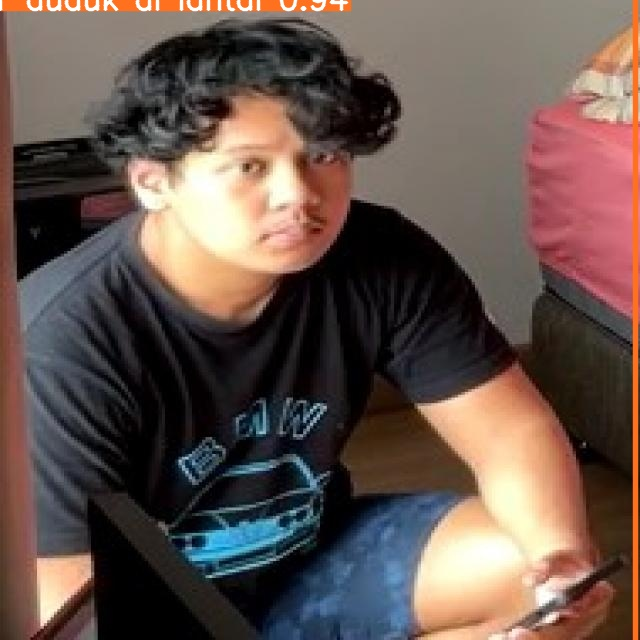

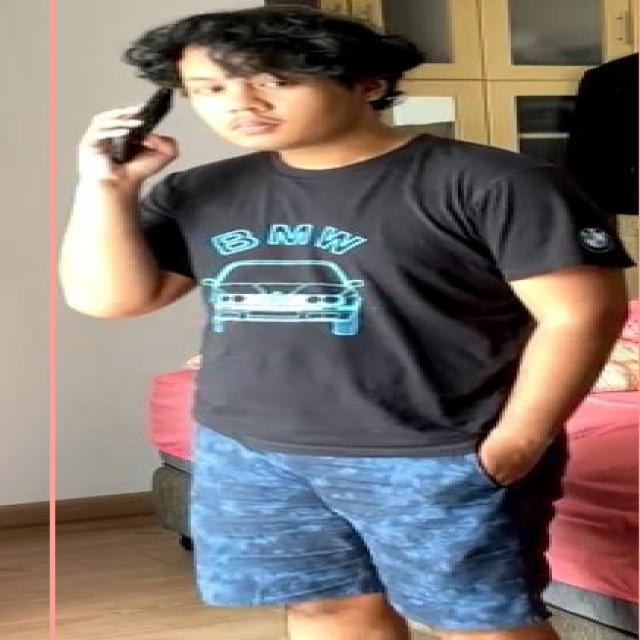

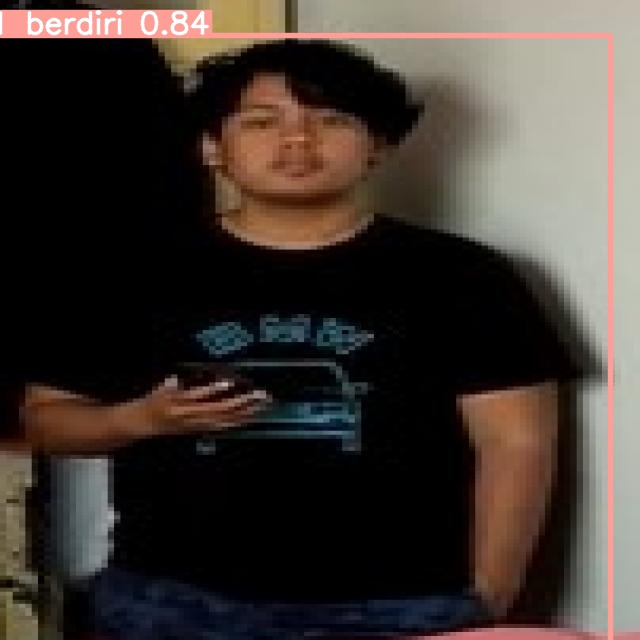

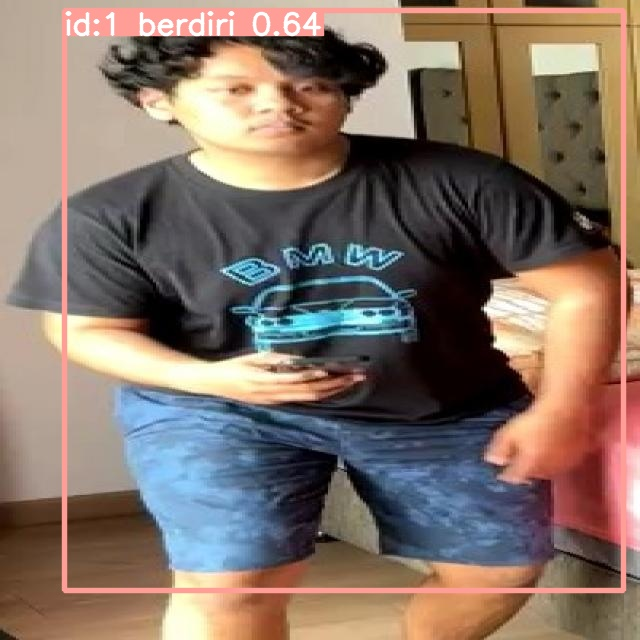

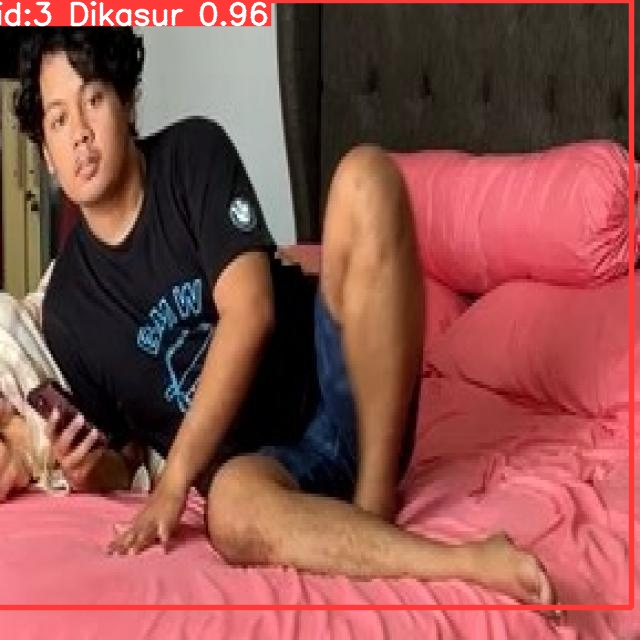

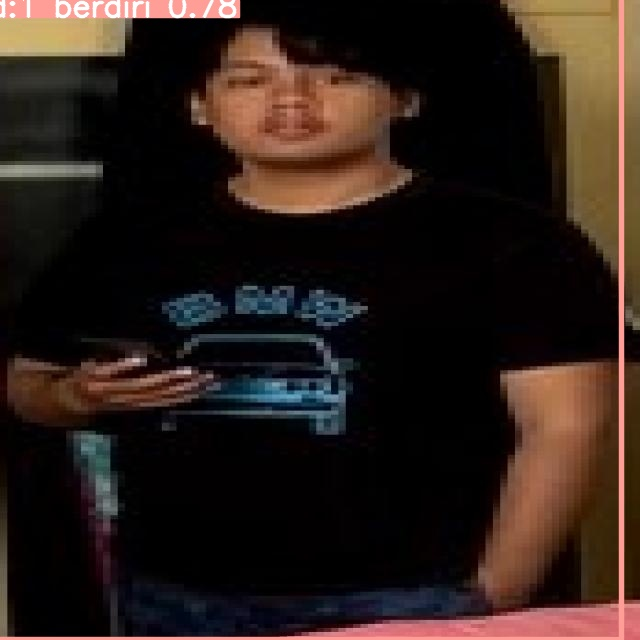

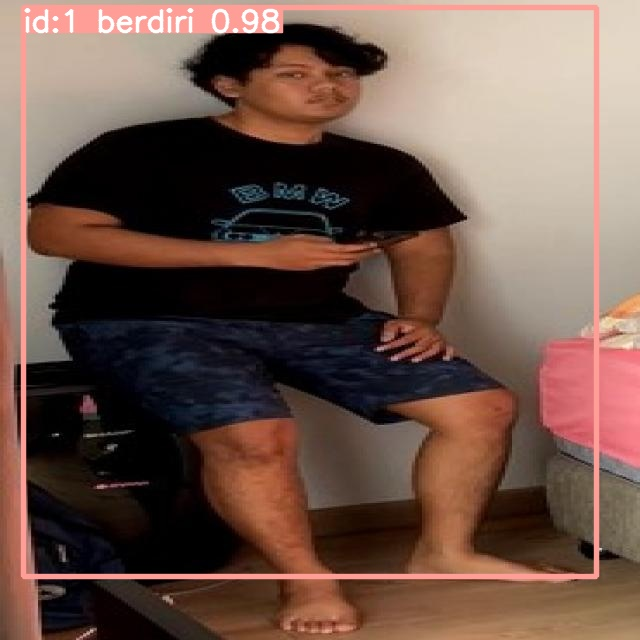

In [11]:
from IPython.display import Image, display
import glob

for imageName in glob.glob('/content/placee_detect/ultralytics/runs/detect/track/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")